In [1]:
import openmm as mm
from openmm import unit
from openmm import app
import numpy as np
from matplotlib import pyplot as plt

# Pozo armónico

'(K/2.0) * (x^2 + y^2 + z^2)'

K = 10.0 * unit.kilocalories_per_mole/unit.angstrom**2

T = 300.0 * unit.Kelvin

In [230]:
T = 100 * unit.kelvin

In [231]:
K = 10.0 * unit.kilocalories_per_mole/unit.angstrom**2

In [232]:
def potencial(x):

    return 0.5*K*x**2

In [233]:
x = 0.1 * unit.angstroms

In [234]:
potencial(x)

Quantity(value=0.05000000000000001, unit=kilocalorie/mole)

In [235]:
serie_x = np.linspace(-1.0, 1.0, 200) * unit.angstroms

In [236]:
serie_x

Quantity(value=array([-1.        , -0.98994975, -0.9798995 , -0.96984925, -0.95979899,
       -0.94974874, -0.93969849, -0.92964824, -0.91959799, -0.90954774,
       -0.89949749, -0.88944724, -0.87939698, -0.86934673, -0.85929648,
       -0.84924623, -0.83919598, -0.82914573, -0.81909548, -0.80904523,
       -0.79899497, -0.78894472, -0.77889447, -0.76884422, -0.75879397,
       -0.74874372, -0.73869347, -0.72864322, -0.71859296, -0.70854271,
       -0.69849246, -0.68844221, -0.67839196, -0.66834171, -0.65829146,
       -0.64824121, -0.63819095, -0.6281407 , -0.61809045, -0.6080402 ,
       -0.59798995, -0.5879397 , -0.57788945, -0.5678392 , -0.55778894,
       -0.54773869, -0.53768844, -0.52763819, -0.51758794, -0.50753769,
       -0.49748744, -0.48743719, -0.47738693, -0.46733668, -0.45728643,
       -0.44723618, -0.43718593, -0.42713568, -0.41708543, -0.40703518,
       -0.39698492, -0.38693467, -0.37688442, -0.36683417, -0.35678392,
       -0.34673367, -0.33668342, -0.32663317, -0.

In [237]:
serie_Vx = []*unit.kilocalorie_per_mole

In [238]:
for aux in serie_x:
    serie_Vx.append(potencial(aux))

In [239]:
serie_Vx

Quantity(value=[5.0, 4.900002525188757, 4.80101512588066, 4.7030378020757055, 4.606070553773895, 4.510113380975228, 4.415166283679705, 4.321229261887327, 4.228302315598091, 4.136385444812, 4.045478649529052, 3.9555819297492483, 3.8666952854725896, 3.778818716699073, 3.691952223428702, 3.6060958056614734, 3.521249463397389, 3.437413196636449, 3.3545870053786517, 3.2727708896239998, 3.1919648493724906, 3.112168884624125, 3.0333829953789038, 2.9556071816368275, 2.8788414433978944, 2.8030857806621046, 2.728340193429459, 2.6546046816999564, 2.581879245473599, 2.5101638847503853, 2.439458599530315, 2.3697633898133885, 2.301078255599606, 2.2334031968889674, 2.166738213681473, 2.101083305977122, 2.036438473775915, 1.9728037170778512, 1.9101790358829325, 1.8485644301911566, 1.7879599000025252, 1.7283654453170374, 1.6697810661346932, 1.6122067624554937, 1.5556425342794373, 1.5000883816065254, 1.4455443044367566, 1.392010302770132, 1.3394863766066514, 1.2879725259463144, 1.2374687507891218, 1.187

In [240]:
magnitud = 2.5*unit.seconds

In [241]:
magnitud._value

2.5

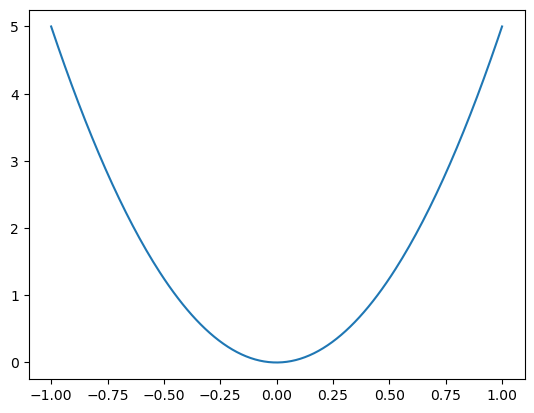

In [242]:
plt.plot(serie_x._value, serie_Vx._value)
plt.show()

### Función de partición

In [243]:
Kb = unit.constants.BOLTZMANN_CONSTANT_kB * unit.constants.AVOGADRO_CONSTANT_NA

In [244]:
Kb = Kb.in_units_of(unit.kilocalories_per_mole/unit.kelvin)

In [245]:
def z(x):
    beta = 1.0/(Kb*T)
    return np.exp(- beta * 0.5*K*x**2)

In [246]:
serie_zx = []

In [247]:
for aux in serie_x:
    serie_zx.append(z(aux))

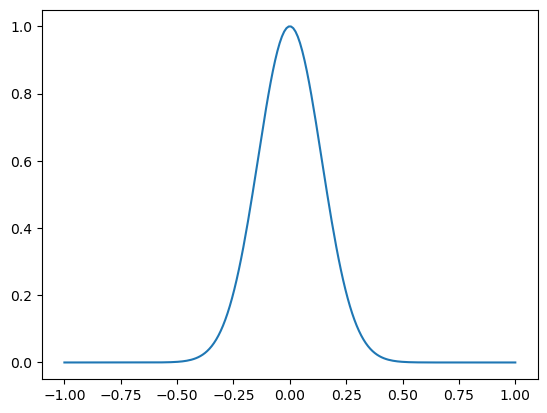

In [248]:
plt.plot(serie_x._value, serie_zx)
plt.show()

In [249]:
Z = np.sum(serie_zx)

In [250]:
Z

35.15881827300879

In [251]:
serie_Px = serie_zx/Z

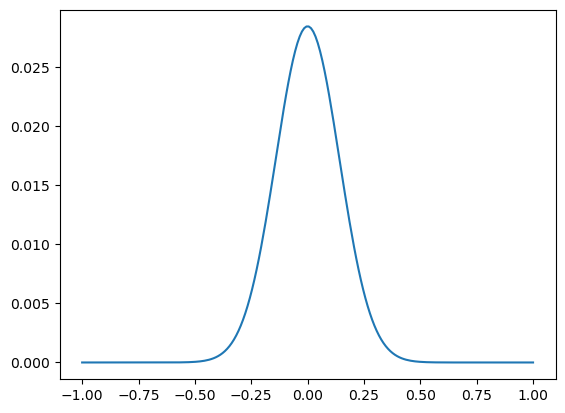

In [252]:
plt.plot(serie_x._value, serie_Px)
plt.show()

## Vamos a hacer un experimento para ver si es verdad...

## Creamos el sistema

In [181]:
system = mm.System()

In [182]:
system.addParticle(39.948 * unit.amu) # masa del átomo de argón

0

In [183]:
system.getNumParticles()

1

# Añadimos el potencial externo

In [184]:
force = mm.CustomExternalForce('(K/2.0) * (x^2 + y^2 + z^2)')

In [185]:
force.addGlobalParameter('K',  10.0 * unit.kilocalories_per_mole/unit.angstrom**2)

0

In [186]:
force.addParticle(0)

0

In [187]:
system.addForce(force)

0

## Estado termodinámico

In [209]:
# Formalismo NVT
temperature = 100.0*unit.kelvin
pressure    = None

## Parametros de la simulación

In [210]:
integration_timestep = 2.0*unit.femtoseconds
saving_timestep = 0.01*unit.picoseconds
simulation_time = 500.0*unit.picoseconds

saving_steps = int(saving_timestep/integration_timestep)
num_saving_steps = int(simulation_time/saving_timestep)

## Integrador

In [211]:
friction   = 20.0/unit.picosecond
integrator = mm.LangevinIntegrator(temperature, friction, integration_timestep)

## Plataforma

In [212]:
platform = mm.Platform.getPlatformByName('CUDA')

## Reporteros

In [213]:
times = np.zeros(num_saving_steps, np.float32) * unit.picoseconds
positions  = np.zeros([num_saving_steps,3], np.float32) * unit.angstroms
velocities = np.zeros([num_saving_steps,3], np.float32) * unit.angstroms/unit.picosecond
potential_energies   = np.zeros([num_saving_steps], np.float32) * unit.kilocalories_per_mole
kinetic_energies     = np.zeros([num_saving_steps], np.float32) * unit.kilocalories_per_mole

## Condiciones iniciales

In [214]:
initial_positions  = [[0.0, 0.0, 0.0]] * unit.angstroms

## Creamos el contexto

In [215]:
context = mm.Context(system, integrator, platform)

In [216]:
context.setPositions(initial_positions)

In [217]:
#context.setVelocitiesToTemperature(temperature)

## Llenamos los reporteros para el paso 0

In [218]:
state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)

In [219]:
times[0] =  state.getTime()
positions[0] = state.getPositions()[0]
velocities[0] = state.getVelocities()[0]
kinetic_energies[0]=state.getKineticEnergy()
potential_energies[0]=state.getPotentialEnergy()

## Corriendo la simulación

In [220]:
for ii in range(num_saving_steps):
    context.getIntegrator().step(saving_steps)
    state_xx = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
    times[ii] = state_xx.getTime()
    positions[ii] = state_xx.getPositions()[0]
    velocities[ii] = state_xx.getVelocities()[0]
    kinetic_energies[ii]=state_xx.getKineticEnergy()
    potential_energies[ii]=state_xx.getPotentialEnergy()
    #print('Paso',ii,'con tiempo', state_xx.getTime())

## Representamos los datos de la simulación

### Trayectoria

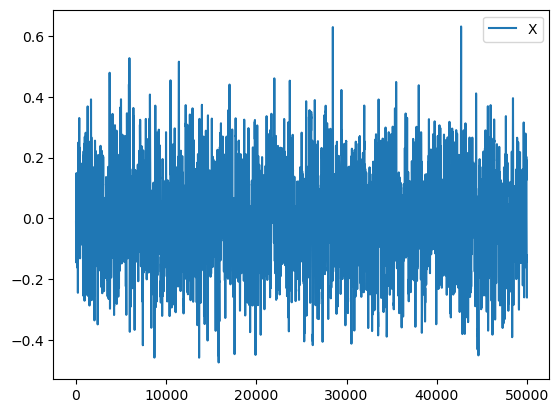

In [221]:
plt.plot(positions[:,0], label='X')
plt.legend()
plt.show()

In [222]:
serie_x.shape

(200,)

In [223]:
frecuencias = np.zeros((199))

In [224]:
delta = (serie_x[1]-serie_x[0])

In [225]:
for x in positions[:,0]:
    indice_cajon = int((x-serie_x[0])/delta)
    frecuencias[indice_cajon] += 1

In [226]:
frecuencias

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.000e+00, 1.100e+01,
       9.000e+00, 1.000e+01, 1.100e+01, 1.200e+01, 1.200e+01, 3.000e+01,
       2.600e+01, 4.800e+01, 7.300e+01, 8.200e+01, 6.800e+01, 7.700e+01,
       9.000e+01, 1.150e+02, 1.320e+02, 1.440e+02, 1.690e+02, 2.300e+02,
       2.560e+02, 2.830e+02, 3.200e+02, 3.720e+02, 4.500e+02, 4.630e+02,
       4.570e+02, 4.940e+02, 5.580e+02, 6.310e+02, 

In [227]:
probabilidades_observadas = frecuencias / np.sum(frecuencias)

In [228]:
densidad_probabilidades_observadas = probabilidades_observadas

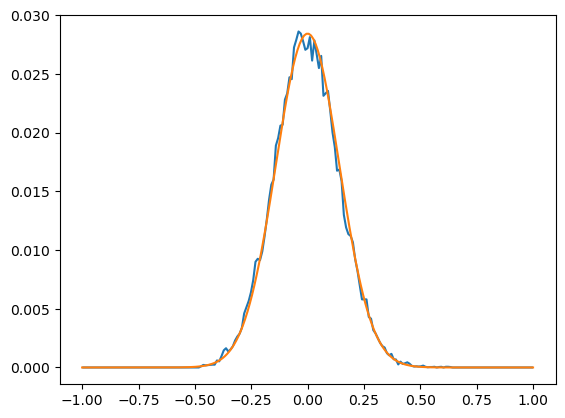

In [253]:
plt.plot((serie_x[1:]+serie_x[0:-1])/2.0, densidad_probabilidades_observadas)
plt.plot(serie_x._value, serie_Px)
plt.show()

- Qué pasa si hago el experimento a distintas fricciones?